# Problem Set 1 - Neural Network Implementation

## PS1 Group A

### Augusto Fonseca - 225984 - a.fonseca@students.hertie-school.org
### Jorge Roa - 226454 - j.roa@students.hertie-school.org
### Santiago Ruz - 214661 - santiago.sordo@students.hertie-school.org

As described in section "3 Neural network implementation" of assignment 1, the goal is to build a Feed-forward Neural Network for classification using different approaches. To validate that your code is working and that the network is actually learning something, you can use the MNIST dataset. Finally, please submit proof of the learning progress as described in the assignment.

## Imports

In [4]:
import random
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from network_scratch import NeuralNetwork
from network_pytorch import NeuralNetworkTorch
from network_tensorflow import NeuralNetworkTf, TimeBasedLearningRate
import utils
import torchvision as tv
import torch

tf.config.run_functions_eagerly(True)

In [5]:
# Automatically load changes in imported modules
%load_ext autoreload
%autoreload 2

# Explicitly set seed for reproducibility
GLOBAL_RANDOM_STATE = 42

random.seed(GLOBAL_RANDOM_STATE)
np.random.seed(GLOBAL_RANDOM_STATE)

## A) Neural Network Classifier from Scratch

### Data


In [6]:
# Download MNIST dataset
x, y = fetch_openml('mnist_784', version=1, return_X_y=True, cache=True, as_frame=False)

# Preprocess dataset
x = (x / 255).astype('float32')
y = tf.keras.utils.to_categorical(y)

# Use only small subset of data for faster training
x = x[:1000]
y = y[:1000]

# Split data into train and validation set
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=GLOBAL_RANDOM_STATE)



/Users/jorgeroa/.local/share/virtualenvs/problem-set-1-ps1_a-lSFdR3SB/lib/python3.11/site-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


### ML Model & Training

In [7]:
dnn = NeuralNetwork([x_train.shape[1], 2**7, 2**6, 10], learning_rate=1.5, epochs=50)
history = dnn.fit(x_train, y_train, x_val, y_val)

Epoch: 1, Training Time: 0.77s, Training Accuracy: 72.62%, Validation Accuracy: 66.50%
Epoch: 2, Training Time: 1.45s, Training Accuracy: 85.75%, Validation Accuracy: 80.50%
Epoch: 3, Training Time: 2.05s, Training Accuracy: 92.38%, Validation Accuracy: 84.00%
Epoch: 4, Training Time: 2.77s, Training Accuracy: 94.88%, Validation Accuracy: 84.50%
Epoch: 5, Training Time: 3.42s, Training Accuracy: 96.12%, Validation Accuracy: 85.00%
Epoch: 6, Training Time: 3.93s, Training Accuracy: 97.25%, Validation Accuracy: 85.50%
Epoch: 7, Training Time: 4.52s, Training Accuracy: 97.88%, Validation Accuracy: 87.50%
Epoch: 8, Training Time: 5.04s, Training Accuracy: 98.50%, Validation Accuracy: 89.00%
Epoch: 9, Training Time: 5.68s, Training Accuracy: 98.75%, Validation Accuracy: 90.00%
Epoch: 10, Training Time: 6.41s, Training Accuracy: 98.88%, Validation Accuracy: 90.50%
Epoch: 11, Training Time: 7.30s, Training Accuracy: 98.88%, Validation Accuracy: 90.50%
Epoch: 12, Training Time: 7.91s, Training

### Evaluation

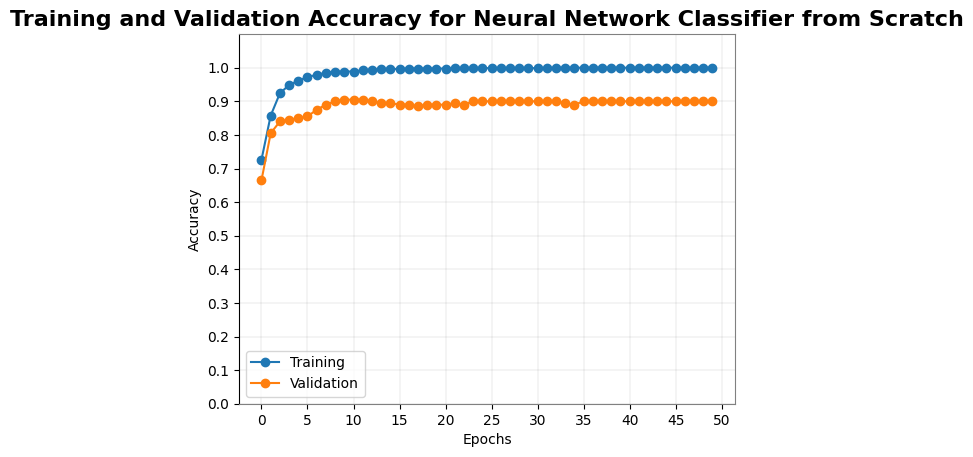

In [22]:
'''TODO: plot accuracy on train and validation set over epochs'''

plt.plot(history['accuracy'], label='Training', marker='o')
plt.plot(history['val_accuracy'], label='Validation', marker='o')

plt.xticks(np.arange(0, 51, 5))
plt.yticks(np.arange(0, 1.1, 0.1))

plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
plt.gca().spines['bottom'].set_color('grey')
plt.gca().spines['top'].set_color('grey')
plt.gca().spines['right'].set_color('grey')

plt.title('Training and Validation Accuracy for Neural Network Classifier from Scratch', fontsize=16, fontweight='bold')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Set the y-axis limits to 0 and 1.1
plt.ylim([0, 1.1])

plt.show()



## B) Neural Network Classifier using PyTorch

### Data

In [17]:
# Define data preprocessing steps
transform = tv.transforms.Compose([
                tv.transforms.ToTensor(),
                tv.transforms.Normalize((0.5,), (0.5,))
            ])

# Download MNIST dataset
train_set = tv.datasets.MNIST('data', train=True, download=True, transform=transform)
val_set = tv.datasets.MNIST('data', train=False, download=True, transform=transform)

# Use only small subset of data for faster training
train_set = torch.utils.data.Subset(train_set, range(1000))
val_set = torch.utils.data.Subset(val_set, range(1000))

# Utilize PyTorch DataLoader from simplified & harmonized loading of data
train_loader = torch.utils.data.DataLoader(train_set, batch_size=1)
val_loader = torch.utils.data.DataLoader(val_set, batch_size=1)


100.0%


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



100.0%


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



100.0%


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



100.0%

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



### ML Model & Training

In [18]:
model = NeuralNetworkTorch(sizes=[784, 2**7, 2**6, 10], learning_rate=0.01, epochs=50, random_state=GLOBAL_RANDOM_STATE)
history_torch = model.fit(train_loader, val_loader)

Epoch: 1, Training Time: 0.62s, Learning Rate: 0.01, Training Accuracy: 11.70%, Validation Accuracy: 9.90%
Epoch: 2, Training Time: 1.22s, Learning Rate: 0.01, Training Accuracy: 12.10%, Validation Accuracy: 10.10%
Epoch: 3, Training Time: 1.83s, Learning Rate: 0.01, Training Accuracy: 33.00%, Validation Accuracy: 30.10%
Epoch: 4, Training Time: 2.43s, Learning Rate: 0.01, Training Accuracy: 44.00%, Validation Accuracy: 40.60%
Epoch: 5, Training Time: 3.02s, Learning Rate: 0.01, Training Accuracy: 55.80%, Validation Accuracy: 51.10%
Epoch: 6, Training Time: 3.60s, Learning Rate: 0.01, Training Accuracy: 64.40%, Validation Accuracy: 58.00%
Epoch: 7, Training Time: 4.20s, Learning Rate: 0.01, Training Accuracy: 71.00%, Validation Accuracy: 62.70%
Epoch: 8, Training Time: 4.80s, Learning Rate: 0.01, Training Accuracy: 75.50%, Validation Accuracy: 66.90%
Epoch: 9, Training Time: 5.40s, Learning Rate: 0.01, Training Accuracy: 79.00%, Validation Accuracy: 69.90%
Epoch: 10, Training Time: 6.0

### Evaluation

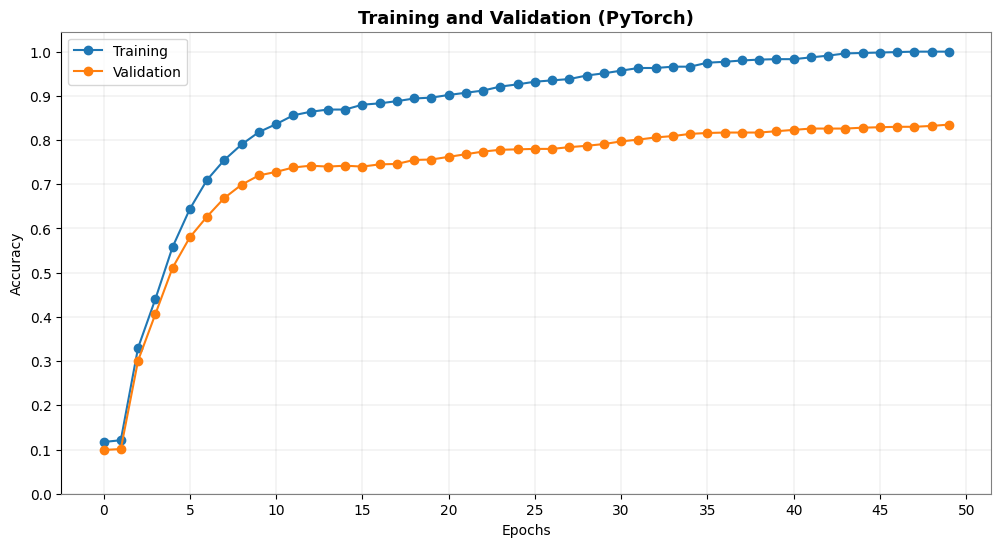

In [31]:
'''TODO: plot accuracy on train and validation set over epochs'''
history_torch

plt.figure(figsize=(12,6))
plt.plot(history_torch['accuracy'], label='Training', marker='o')
plt.plot(history_torch['val_accuracy'], label='Validation', marker='o')
plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
plt.xticks(np.arange(0, 51, 5))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.gca().spines['bottom'].set_color('grey')
plt.gca().spines['top'].set_color('grey')
plt.gca().spines['right'].set_color('grey')
plt.title('Training and Validation (PyTorch)', fontsize=13, fontweight='bold')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()




## C) Neural Network Classifier using Keras

### Data

In [24]:
# Download MNIST dataset
(x_train, y_train), (x_val, y_val) = tf.keras.datasets.mnist.load_data()

# Preprocess dataset
x_train = x_train.astype('float32') / 255
x_val = x_val.astype('float32') / 255
y_train = tf.keras.utils.to_categorical(y_train)
y_val = tf.keras.utils.to_categorical(y_val)

# Use only small subset of data for faster training

x_train = x_train[:1000]
y_train = y_train[:1000]

x_val = x_val[:1000]
y_val = y_val[:1000]


### ML Model & Training

In [25]:
model_tf = NeuralNetworkTf(sizes=[784, 2**7, 2**5, 10])
tb_learning_rate = TimeBasedLearningRate(10)

In [26]:
history_tf = model_tf.compile_and_fit(x_train, y_train, validation_data=(x_val, y_val), epochs=50, learning_rate=tb_learning_rate, batch_size=1)

Epoch 1/50
  11/1000 [..............................] - ETA: 10s - loss: 46.7872 - accuracy: 0.0000e+00

/Users/jorgeroa/.local/share/virtualenvs/problem-set-1-ps1_a-lSFdR3SB/lib/python3.11/site-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


1000/1000 [==============================] - 12s 12ms/step - loss: 7.5937 - accuracy: 0.0940 - val_loss: 6.3035 - val_accuracy: 0.0890
Epoch 2/50
1000/1000 [==============================] - 13s 13ms/step - loss: 6.2247 - accuracy: 0.1120 - val_loss: 6.5610 - val_accuracy: 0.0870
Epoch 3/50
1000/1000 [==============================] - 13s 13ms/step - loss: 6.2666 - accuracy: 0.1060 - val_loss: 6.4936 - val_accuracy: 0.0870
Epoch 4/50
1000/1000 [==============================] - 12s 12ms/step - loss: 6.3569 - accuracy: 0.0930 - val_loss: 6.5097 - val_accuracy: 0.0940
Epoch 5/50
1000/1000 [==============================] - 13s 13ms/step - loss: 6.2476 - accuracy: 0.1070 - val_loss: 4.5563 - val_accuracy: 0.1100
Epoch 6/50
1000/1000 [==============================] - 14s 14ms/step - loss: 5.3812 - accuracy: 0.1070 - val_loss: 5.1905 - val_accuracy: 0.1100
Epoch 7/50
1000/1000 [==============================] - 13s 13ms/step - loss: 5.4046 - accuracy: 0.1030 - val_loss: 5.4502 - val_accura

In [27]:
model_twotf = NeuralNetworkTf(sizes=[128, 64, 10])
tb_learning_rate_two = TimeBasedLearningRate(0.02, decay = 0.001, min_learning_rate=0.01)

In [29]:
history_tf_two = model_twotf.compile_and_fit(x_train, y_train, validation_data=(x_val, y_val), epochs=50, learning_rate=tb_learning_rate_two, batch_size=32)

Epoch 1/50
14/32 [============>.................] - ETA: 0s - loss: 2.0768 - accuracy: 0.5469

/Users/jorgeroa/.local/share/virtualenvs/problem-set-1-ps1_a-lSFdR3SB/lib/python3.11/site-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


32/32 [==============================] - 0s 12ms/step - loss: 2.0846 - accuracy: 0.5280 - val_loss: 2.1145 - val_accuracy: 0.4670
Epoch 2/50
32/32 [==============================] - 0s 10ms/step - loss: 2.0762 - accuracy: 0.5240 - val_loss: 2.1093 - val_accuracy: 0.4790
Epoch 3/50
32/32 [==============================] - 0s 11ms/step - loss: 2.0686 - accuracy: 0.5410 - val_loss: 2.1018 - val_accuracy: 0.4790
Epoch 4/50
32/32 [==============================] - 0s 12ms/step - loss: 2.0612 - accuracy: 0.5340 - val_loss: 2.0958 - val_accuracy: 0.5000
Epoch 5/50
32/32 [==============================] - 0s 11ms/step - loss: 2.0536 - accuracy: 0.5680 - val_loss: 2.0882 - val_accuracy: 0.4960
Epoch 6/50
32/32 [==============================] - 0s 10ms/step - loss: 2.0452 - accuracy: 0.5740 - val_loss: 2.0812 - val_accuracy: 0.5020
Epoch 7/50
32/32 [==============================] - 0s 10ms/step - loss: 2.0370 - accuracy: 0.5620 - val_loss: 2.0736 - val_accuracy: 0.4790
Epoch 8/50
32/32 [======

### Evaluation

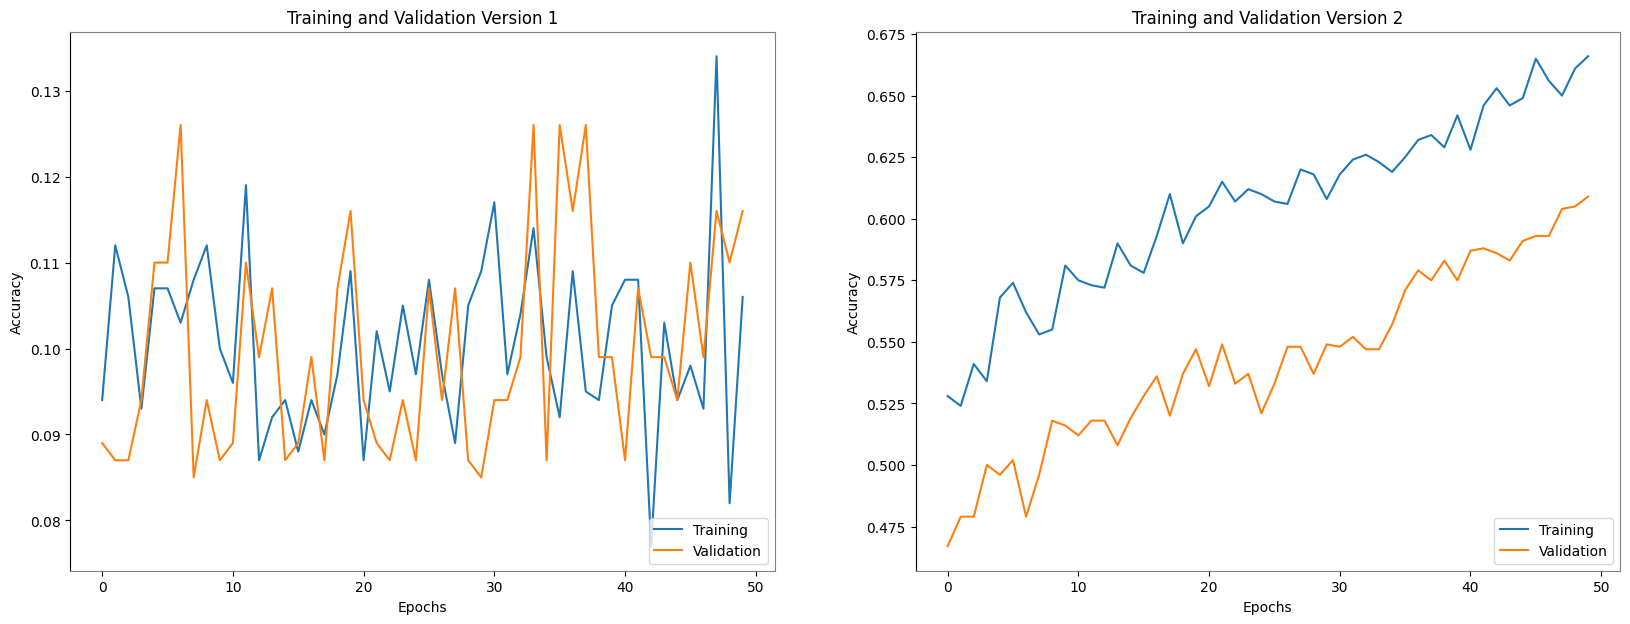

In [37]:
'''TODO: plot accuracy on train and validation set over epochs'''


fig, figures = plt.subplots(nrows=1, ncols=2, figsize=(20, 7))

# Plot history_tf
figures[0].plot(history_tf.history['accuracy'], label='Training')
figures[0].plot(history_tf.history['val_accuracy'], label='Validation')
figures[0].set_title('Training and Validation Version 1')
figures[0].set_xlabel('Epochs')
figures[0].set_ylabel('Accuracy')
figures[0].spines['bottom'].set_color('grey')
figures[0].spines['top'].set_color('grey')
figures[0].spines['right'].set_color('grey')
figures[0].legend(loc='lower right')

# Plot history_tf_two
figures[1].plot(history_tf_two.history['accuracy'], label='Training')
figures[1].plot(history_tf_two.history['val_accuracy'], label='Validation')
figures[1].set_title('Training and Validation Version 2')
figures[1].set_xlabel('Epochs')
figures[1].set_ylabel('Accuracy')
figures[1].spines['bottom'].set_color('grey')
figures[1].spines['top'].set_color('grey')
figures[1].spines['right'].set_color('grey')
figures[1].legend(loc='lower right')


We're aware of the undershooting issues in the model, even after modifications. The idea is still to keep looking the hyperparameters for models with sigmoid activations that can improve our model.